In [196]:
import pandas as pd

df = pd.read_csv('./reviews_sentiment.csv', sep= ';')
df.head(10)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


In [197]:
#Practica buena para obtener el numero idoneo de bins para un histograma
#Regla de Freedman Diaconis

def freedman_diaconis(data):
    import numpy as np
    num_data = len(data)
    irq = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * irq / np.power(num_data, 1/3)
    num_bins = np.int_((np.max(data) -  np.min(data)) / bin_width)  + 1
    return num_bins

In [198]:
#Describir el dataframe con metodos estadisticos unicamente de variables continuas
df.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


Text(0.4, 0.4, 'EMPTY')

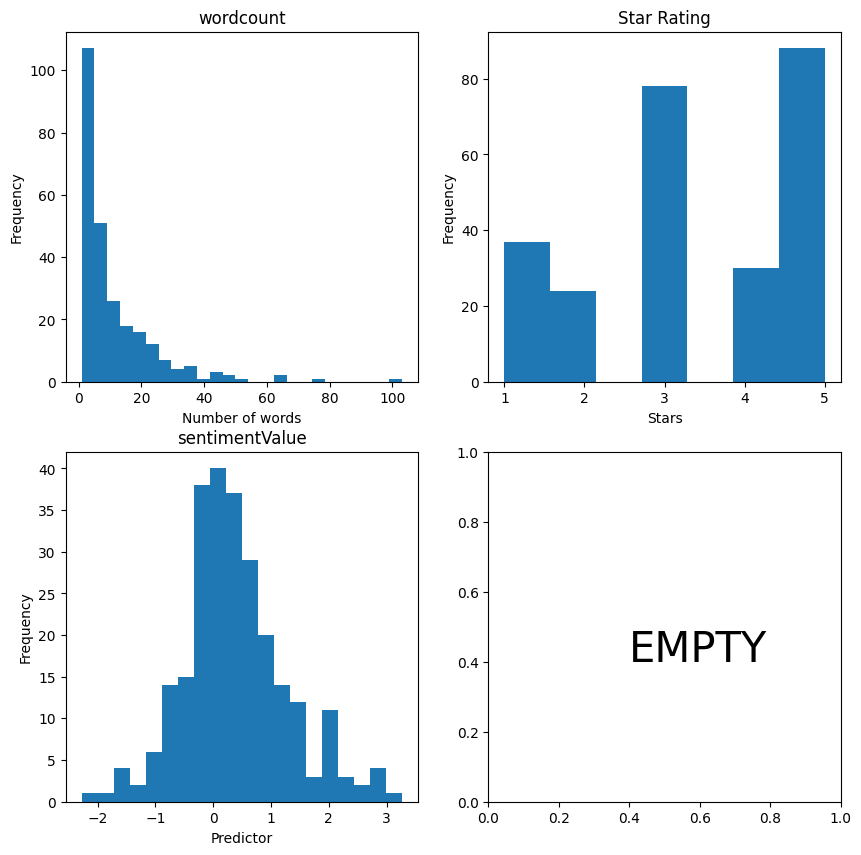

In [199]:
#histograma de las variables continuas del Dataframe

import matplotlib.pyplot as plt

cols = list(df.keys())

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

ax1.hist(df['wordcount'], bins= freedman_diaconis(df['wordcount']))
ax1.set_title('wordcount')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Number of words')

ax2.hist(df['Star Rating'], bins= freedman_diaconis(df['Star Rating']))
ax2.set_title('Star Rating')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Stars')

ax3.hist(df['sentimentValue'], bins= freedman_diaconis(df['sentimentValue']))
ax3.set_title('sentimentValue')
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Predictor')

ax4.text(.4,.4,'EMPTY', size=30)

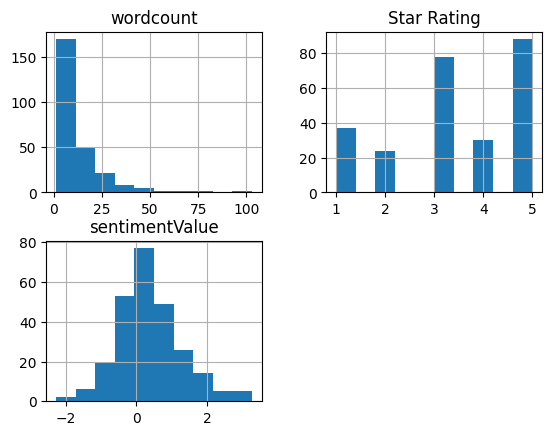

In [200]:
#Histograma directamente del Dataframe

df.hist()
plt.show()

In [201]:
#Distribucion de la cateogira Estrellas

df.groupby('Star Rating').size()

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64

fit() se usa para hacer el ajuste de datos a la normalizacion que requiramos, ya sea normalizacion standar, normalizacion min max, tf-idf o la que requiramos, unicamente para datos de entrenamiento sin transformar o retornar los datos.

transform() se usa para hacer la normalizacion de nuevos datos, siempre para datos de test porque entonces estos datos se ajustan a la normalizacion hecha a los datos de entrenamiento.

fit_transform() Se usa para los datos de train pero a demas de hacer la normalizacion, igual transforma los datos y los retorna ya normalizados.

Si usamos fit o fit_transform con datos de prueba o test, haremos una nueva normalizacion a los datos de prueba y esto hara que haya desajuste con respecto a los datos de entrenamiento.

Ej.

In [202]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

n = np.array([16, 40, 72]).reshape(-1,1)
m = np.array([10, 16, 80])
print('Datos de train: ', '\n', str(n), '\n')

#Declaramos el metodo de normalizacion
scaler = MinMaxScaler()

#Ajustamos los datos de train (normalizamos)
x = scaler.fit(n)
print('fit() ajusta los datos pero no retorna los datos transformados: ', x, '\n')

#Podemos hacer la transformacion por si sola de los datos de train
x = scaler.transform(n)
print('transform() retorna los datos transformados previamente ajustados por un fit(): ', '\n', x, '\n')

#Ajustamos (normalizamos) y transformamos los datos de train
x = scaler.fit_transform(n)
print('fit_transform() retorna datos transformados que fueron ajustados en la misma operacion: ','\n' , x ,'\n')

#Ahora que si queremos hacer uso de la transformacion para datos del test se usaria unicamente transform
y = scaler.transform(m.reshape(-1,1))
print('Datos transformados con transform() basandose en el ajuste de los datos del train: ', '\n', y, '\n')

#Este es un ejemplo de lo que sucederia si usamos fit_transform en el conjunto de prueba
y = scaler.fit_transform(m.reshape(-1,1))
print('Datos de conjunto de prueba re-normalizados, son diferentes comparados con los datos de entrenamiento: ', '\n', y)



Datos de train:  
 [[16]
 [40]
 [72]] 

fit() ajusta los datos pero no retorna los datos transformados:  MinMaxScaler() 

transform() retorna los datos transformados previamente ajustados por un fit():  
 [[0.        ]
 [0.42857143]
 [1.        ]] 

fit_transform() retorna datos transformados que fueron ajustados en la misma operacion:  
 [[0.        ]
 [0.42857143]
 [1.        ]] 

Datos transformados con transform() basandose en el ajuste de los datos del train:  
 [[-0.10714286]
 [ 0.        ]
 [ 1.14285714]] 

Datos de conjunto de prueba re-normalizados, son diferentes comparados con los datos de entrenamiento:  
 [[0.        ]
 [0.08571429]
 [1.        ]]


In [203]:
#Division del conjunto de entrenamiento y prueba

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['wordcount', 'sentimentValue']]
y = df['Star Rating']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    #y.values.reshape(-1,1),
                                                    y,
                                                    random_state= 42, 
                                                    train_size   = 0.8,
                                                    shuffle= True)

# Normalizacion o standarizacion de los datos
scaler = StandardScaler()
# fit_transform aprende los parámetros y aplica la transformación a nuevos datos
X_train = scaler.fit_transform(X_train)
# transform() aplica la transformación aprendida a nuevos datos
X_test = scaler.transform(X_test)

In [204]:
#Creacion y aplicacion del modelo de KNN

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors= 5)
model.fit(X_train, y_train)
print('Accuracy Train: ', model.score(X_train,y_train), '\n')
print('Accuracy Test: ', model.score(X_test, y_test))

Accuracy Train:  0.9073170731707317 

Accuracy Test:  0.8653846153846154


TP = Verdaderos Positivos (Valores clasificados como positivos que si son positivos)

TN = Verdaderos Negativos (Valores clasificados como negativos que si son negativos)

FP = Falsos Positivos (Valores clasificados como positivos que son negativos)

FN = Falsos Negativos (Valores clasificados como negativos que son positivos)

- Accuracy representa el porcentaje de valores correctamente clasificados (Recomendable para datos valanceador, no recomendable fiarse si los datos estan muy desvalanceados)

    Acurracy = (TP + TN) / (TP + TN + FP + FN)

- Precision te indica el porcentaje de verdaderos positivos dentro de una clasificacion. Es decir, si se clasificaron 10 valores con la etiqueta 2 pero solo 8 pertenecen a la etiqueta 2, entonces tiene una precision del 80% o 0.8

    Precision = TP / (TP + FP)

- Recall indica el porcentaje de verdaderos positivos clasificados como verdaderos positivos. Es decir, si hay 20 valores etiquetados como 2 pero solo 8 de esos 20 se clasificaron en la etiqueta 4, entonces es un recall de 40% o 0.4

    Recall = TP / (TP + FN)

- F1-Score es una metrica usada para problemas con conjuntos desvalanceados, combina precision y recall para obtener un valor mas objetivo. La formula es:

    F1 = 2 * ((recall * precison) / (recall + precision))



              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.40      1.00      0.57         2
           3       0.85      0.79      0.81        14
           4       1.00      0.71      0.83         7
           5       1.00      0.95      0.97        19

    accuracy                           0.87        52
   macro avg       0.81      0.87      0.81        52
weighted avg       0.90      0.87      0.87        52



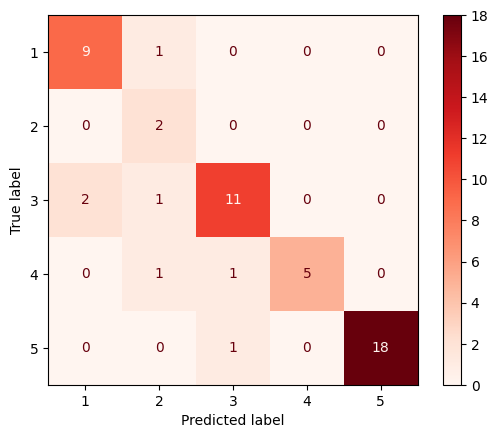

In [205]:
#Metricas de evaluacion del modelo

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

print(classification_report(y_test, model.predict(X_test)))

confusion = ConfusionMatrixDisplay.from_estimator(model,
                                                  X_test,
                                                  y_test,
                                                  display_labels = list(set(df['Star Rating'].values)),
                                                  cmap=plt.cm.Reds)

Para elegir el mejor valor de K o n_neighbors iteraremos K para apreciar el accuracy de cada opcion.

Con un random_state de 42, observamos que el mejor accuracy lo obtenemos con un K de 5

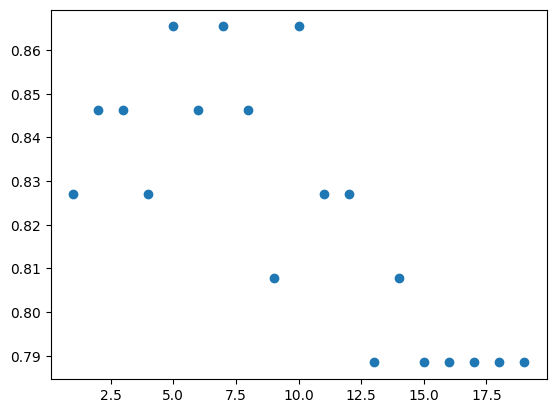

In [206]:
k = range(1,20)
scores = []

for i in k:
    model = KNeighborsClassifier(n_neighbors= i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.figure()
plt.scatter(k, scores)

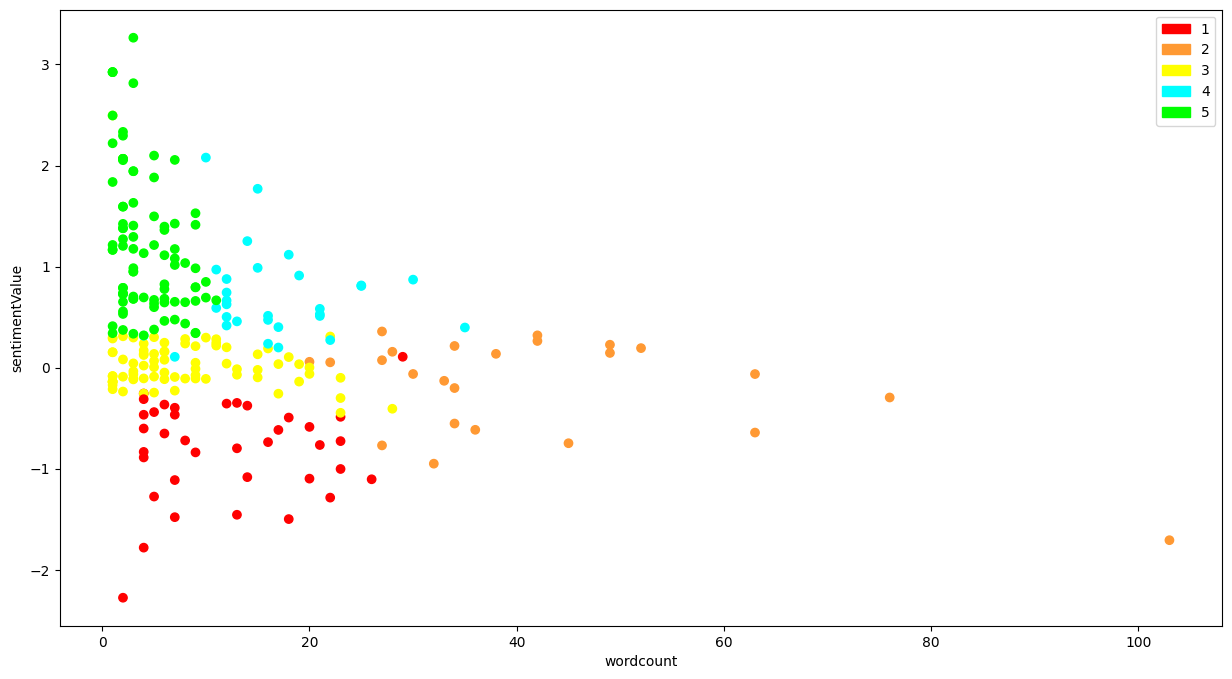

In [207]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

plt.figure(figsize= (15,8))
plt.scatter(df['wordcount'], df['sentimentValue'], c=y, cmap=cmap_bold)

patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')

plt.xlabel('wordcount')
plt.ylabel('sentimentValue')
plt.legend(handles= [patch0, patch1, patch2, patch3,patch4])
plt.show()

Podemos observar en la grafica que posiblemente una resena de 20 palabras y un valor del sentimeinto de 1 sea clasificada como de 4 estrellas.

Veamo si es cierto:

In [208]:
array = [[20,1]]
test = pd.DataFrame(np.array(array), columns=['wordcount', 'sentimentValue'])

print('Star Rating:', model.predict(scaler.transform(test)))

Star Rating: [4]
